In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# To display the all columns in pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# read the training data
df = pd.read_csv("train.csv")

In [3]:
# Number of rows/columns
df.shape

(1460, 81)

In [4]:
# print the data to see sample rows
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Get some basic stats <- not much help here as there are 50+ columns
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Check to see missing values. As seen below, Alley doesn't have much data. FireplaceQu has 50% missing. PoolQC, Fence and Misc are also rare.
# Count doesn't include NaN values. If you want length, use len(df.index). Alsom df.dtypes gives object types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

##### Plot the histogram to see the SalePrice. This shows that most of the houses are within 100k-250k range. (almost ~1100)

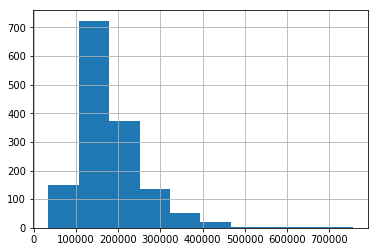

In [7]:
df.SalePrice.hist()

#### Features
There are multiple ideas that can be explored next. Since there are 81 features, I think not all are important. We can bucket these features into categories and can find correlatiom in them. Two things to keep in mind - handle NaN values and convert object to int. 

#### Basement:
BsmtQual         1423   
BsmtCond         1423   
BsmtExposure     1422   
BsmtFinType1     1423   
BsmtFinSF1       1460   
BsmtFinType2     1422   
BsmtFinSF2       1460   

#### Garage:
GarageType       1379   
GarageYrBlt      1379   
GarageFinish     1379   
GarageCars       1460   
GarageArea       1460   
GarageQual       1379   
GarageCond       1379   

So from the above two types, I we can see that for Basement, NA	No Basement is just NaN. So we need to convert NaNs to NA. Same with garage - convert NaNs to NA No Garage. The ints will still be 0. 
   
Also do the same for Fence (NaN -> NA), Pool (NaN -> NA), Misc (NaN->NA)

For  LotFrontage -> NaN should be converted to 0 as it is an int type

In [8]:
# Filling missing values
df['BsmtQual'] = df['BsmtQual'].fillna("NA")
df['BsmtCond'] = df['BsmtCond'].fillna("NA")
df['BsmtExposure'] = df['BsmtExposure'].fillna("NA")
df['BsmtFinType1'] = df['BsmtFinType1'].fillna("NA")
df['BsmtFinType2'] = df['BsmtFinType2'].fillna("NA")

df['GarageType'] = df['GarageType'].fillna("NA")
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0.0)
df['GarageFinish'] = df['GarageFinish'].fillna("NA")
df['GarageQual'] = df['GarageQual'].fillna("NA")
df['GarageCond'] = df['GarageCond'].fillna("NA")

df['FireplaceQu'] = df['FireplaceQu'].fillna("NA")

df['LotFrontage'] = df['LotFrontage'].fillna(0.0)


##### Starting feature engineering. Taking each column and doing some analysis to figure out if we will keep the column or drop the column

array([<matplotlib.axes._subplots.AxesSubplot object at 0x107d03390>,
      dtype=object)

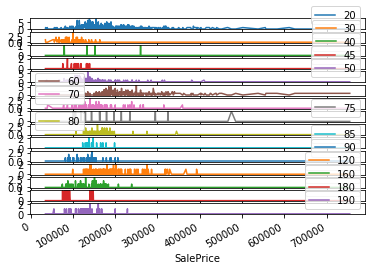

In [9]:
df1 = pd.crosstab(df['SalePrice'], df['MSSubClass'])
df1.plot(subplots=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1089ea590>,
      dtype=object)

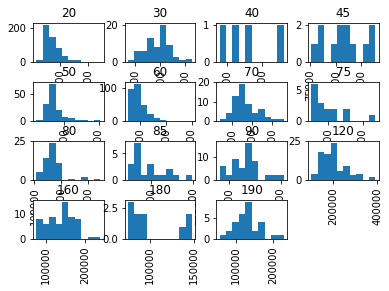

In [10]:
df.hist(column="SalePrice",by="MSSubClass",bins=10)

In [11]:
# comparing the value counts with histogram, we can see that the top three entries have similar shape but since 
# data is sparse, we can keep this. We will keep MSSubClass
df.MSSubClass.value_counts()


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x108eb8d50>,
      dtype=object)

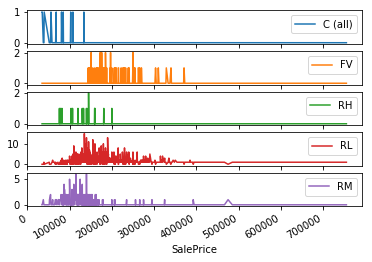

In [12]:
df1 = pd.crosstab(df['SalePrice'], df['MSZoning'])
df1.plot(subplots=True)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10944bb90>,
      dtype=object)

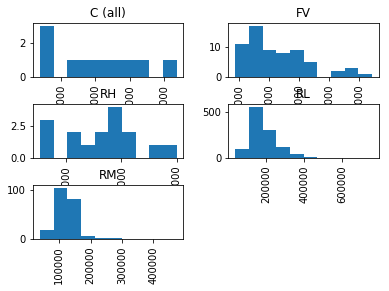

In [13]:
# RL and RM looks like same plots. The rest three add up to 91. We will drop MSZoning.
print df.MSZoning.value_counts()
df.hist(column="SalePrice",by="MSZoning",bins=10)

AxesSubplot(0.125,0.125;0.775x0.755)


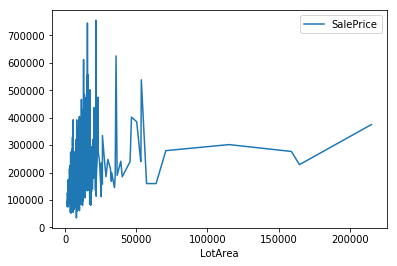

In [14]:
#Determine pivot table. We can see that higher the LotArea, more the price. We will keep LotArea
impute_grps = df.pivot_table(values=["SalePrice"], index=["LotArea"], aggfunc=np.mean).plot()
print impute_grps


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1094ec490>,
      dtype=object)

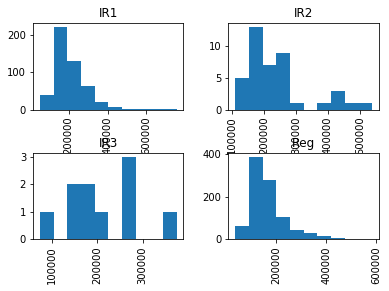

In [15]:
# Reg and IR1 has the same shape. So not much info here. We will drop LotShape
print df.LotShape.value_counts()
df.hist(column="SalePrice",by="LotShape",bins=10)

Pave    1454
Grvl       6
Name: Street, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1097b3b10>,
      dtype=object)

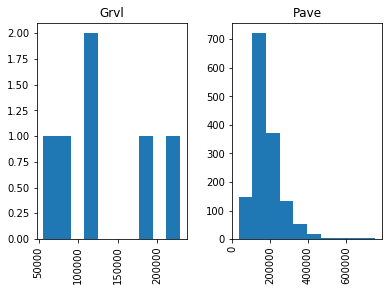

In [16]:
# Street is not a good signal. We will drop Street
print df.Street.value_counts()
df.hist(column="SalePrice",by="Street",bins=10)

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109d3d8d0>,
      dtype=object)

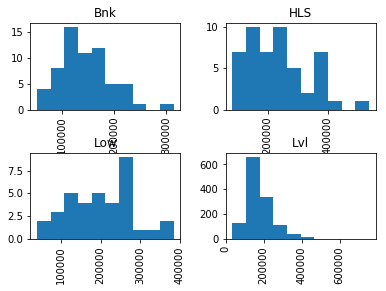

In [17]:
# Land contour doesn't have a lot of variation. We will drop LandContour
print df.LandContour.value_counts()
df.hist(column="SalePrice",by="LandContour",bins=10)


In [18]:
# Utilities is not a good column as there is no variation. We will drop Utilities
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109fcb550>,
      dtype=object)

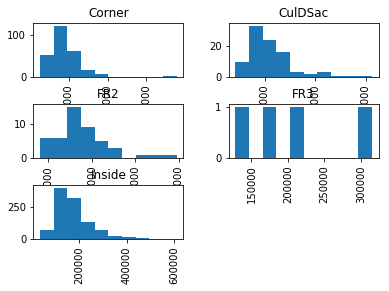

In [19]:
# On the edge for this. We can keep LotConfig
print df.LotConfig.value_counts()
df.hist(column="SalePrice",by="LotConfig",bins=10)

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a27e510>,
      dtype=object)

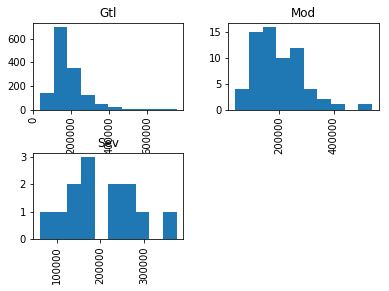

In [20]:
# More than 90% of the data is from a single value. We will drop LandSlope
print df.LandSlope.value_counts()
df.hist(column="SalePrice",by="LandSlope",bins=10)

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a51d790>,
      dtype=object)

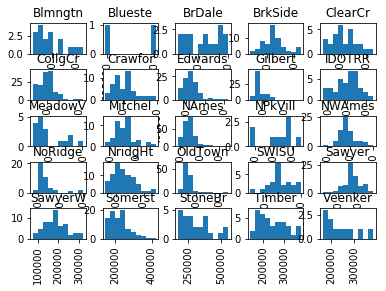

In [21]:
# We can keep this for now as there is some value here. We will keep Neighborhood
print df.Neighborhood.value_counts()
df.hist(column="SalePrice",by="Neighborhood",bins=10)

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10adb4d10>,
      dtype=object)

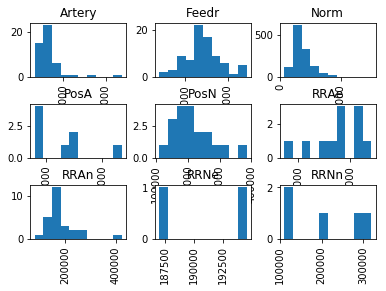

In [22]:
# Not sure of this signal. We can revisit it later. We will keep Condition1
print df.Condition1.value_counts()
df.hist(column="SalePrice",by="Condition1",bins=10)

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b28fa50>,
      dtype=object)

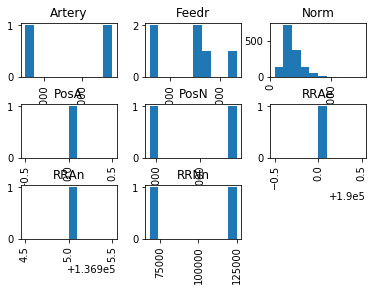

In [23]:
# Most of condition 2 is normal. We will drop Condition2
print df.Condition2.value_counts()
df.hist(column="SalePrice",by="Condition2",bins=10)

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b8ca810>,
      dtype=object)

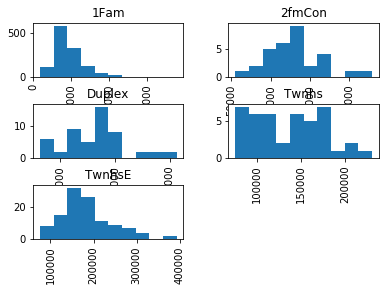

In [24]:
# On the edge. We will revisit it. We will keep BldgType
print df.BldgType.value_counts()
df.hist(column="SalePrice",by="BldgType",bins=10)

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10bda3c50>,
      dtype=object)

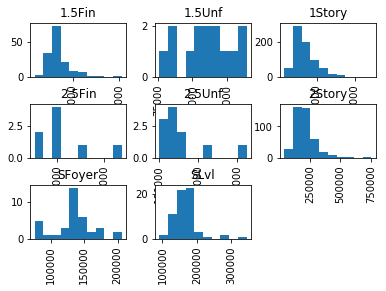

In [25]:
# Is there a way to combine HouseStyle and BldgType? We can find some correlation? We will keep HouseStyle
print df.HouseStyle.value_counts() 
df.hist(column="SalePrice",by="HouseStyle",bins=10)

In [26]:
# Not sure how to find correlation as both the values are objects.
df.filter(items=["BldgType", "HouseStyle"]).corr()

""


5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c099190>,
      dtype=object)

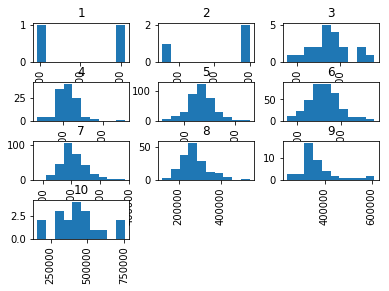

In [27]:
# We will keep OverallQual
print df.OverallQual.value_counts()
df.hist(column="SalePrice",by="OverallQual",bins=10)

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c7b7110>,
      dtype=object)

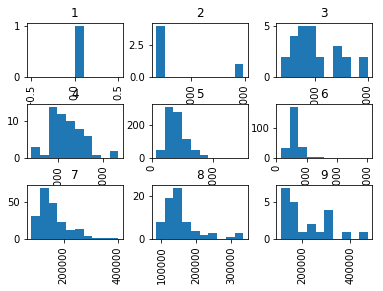

In [28]:
# Is there a correlation with OverallQual? We will keep OverallCond
print df.OverallCond.value_counts()
df.hist(column="SalePrice",by="OverallCond",bins=10)

In [29]:
# Check for correlation
df.filter(items=["OverallQual", "OverallCond"]).corr()

,OverallQual,OverallCond
OverallQual,1.000000,-0.091932
OverallCond,-0.091932,1.000000


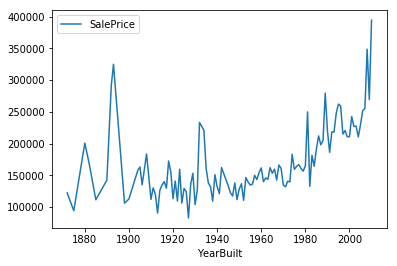

In [30]:
# YearBuilt is a good signal as the price increases as teh year increases. We will keep YearBuilt
df.pivot_table(values=["SalePrice"], index=["YearBuilt"], aggfunc=np.mean).plot()
#print df.YearBuilt.value_counts()


,YearBuilt,YearRemodAdd
YearBuilt,1.000000,0.592855
YearRemodAdd,0.592855,1.000000


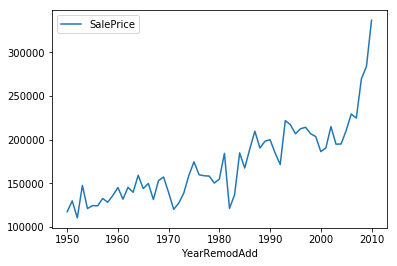

In [31]:
# looks like a good signal. We need to find correlation with year built.
#print df.YearRemodAdd.value_counts()
df.pivot_table(values=["SalePrice"], index=["YearRemodAdd"], aggfunc=np.mean).plot()

# It has around 0.6 correlation. We will drop YearRemodAdd
df.filter(items=["YearBuilt", "YearRemodAdd"]).corr()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ccf6550>,
      dtype=object)

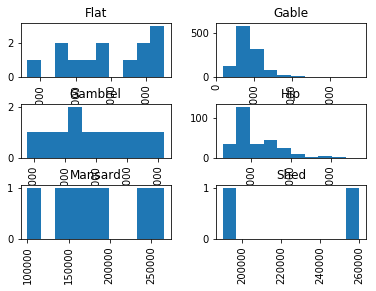

In [32]:
# Gable and Hip has similar histograms. This signal is not adding value. We will drop RoofStyle
print df.RoofStyle.value_counts()
df.hist(column="SalePrice",by="RoofStyle",bins=10)

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Metal         1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d1e67d0>,
      dtype=object)

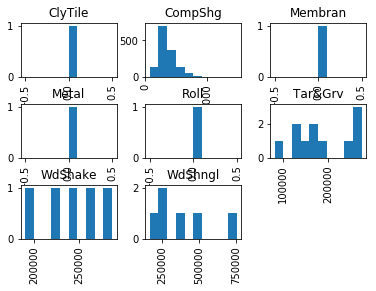

In [33]:
# We will drop RoofMatl
print df.RoofMatl.value_counts()
df.hist(column="SalePrice",by="RoofMatl",bins=10)

In [34]:
# Clean up the values
df['Exterior2nd'] = df['Exterior2nd'].str.replace("CmentBd","CemntBd")
df['Exterior2nd'] = df['Exterior2nd'].str.replace("Wd Shng","WdShing")

# only 139 values are different. Hence both of them are highly correlated. Hence just need once. We will keep Exterior1st
# We will drop Exterior2nd
df[df.Exterior1st != df.Exterior2nd].filter(items=["Exterior1st", "Exterior2nd", "SalePrice"]).count()


Exterior1st    139
Exterior2nd    139
SalePrice      139
dtype: int64

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a058150>,
      dtype=object)

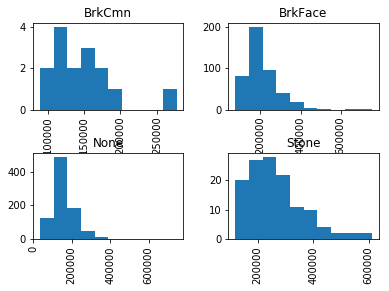

In [35]:
# Not sure about this as 50% of values are None (which is a valid type). We will keep MasVnrType
print df.MasVnrType.value_counts()
df.hist(column="SalePrice",by="MasVnrType",bins=10)

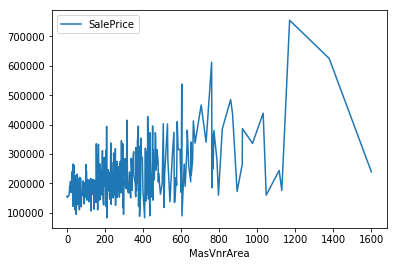

In [36]:
# MasVnrArea is a good signal to keep. We will keep MasVnrArea
#print df.MasVnrArea.value_counts()
df.pivot_table(values=["SalePrice"], index=["MasVnrArea"], aggfunc=np.mean).plot()


TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
    ExterQual  ExterCond
Ex       52.0          3
Fa       14.0         28
Gd      488.0        146
Po        NaN          1
TA      906.0       1282


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d90d250>,
      dtype=object)

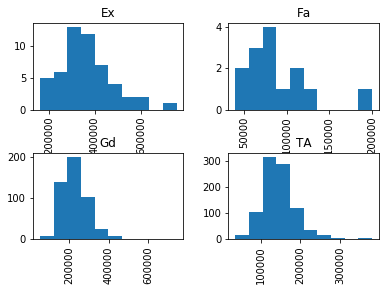

In [37]:
# It can be a okay signal. We will keep ExterQual
print df.ExterQual.value_counts()
print df.filter(items=['ExterQual', 'ExterCond']).apply(pd.Series.value_counts)

df.hist(column="SalePrice",by="ExterQual",bins=10)

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cd63e90>,
      dtype=object)

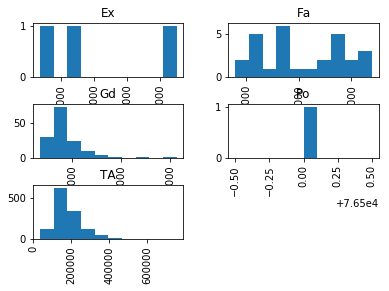

In [38]:
# Doesn't look like a good signal as TA+Gd covers most data. We will drop ExterCond
print df.ExterCond.value_counts()
df.hist(column="SalePrice",by="ExterCond",bins=10)

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ddbe390>,
      dtype=object)

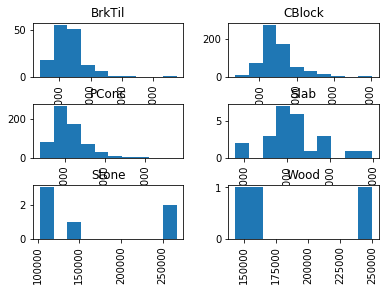

In [39]:
# Need to revisit. We will keep Foundation
print df.Foundation.value_counts()
df.hist(column="SalePrice",by="Foundation",bins=10)

TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64
No    953
Av    221
Gd    134
Mn    114
NA     38
Name: BsmtExposure, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e7681d0>,
      dtype=object)

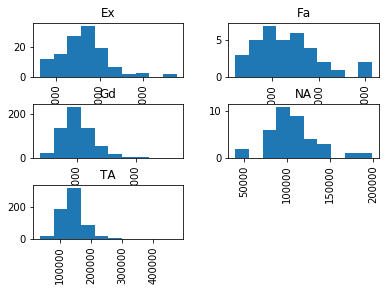

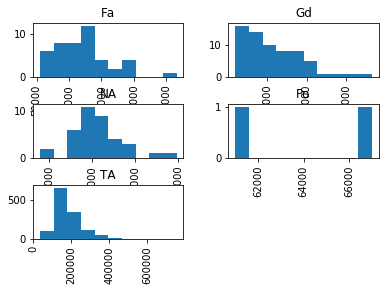

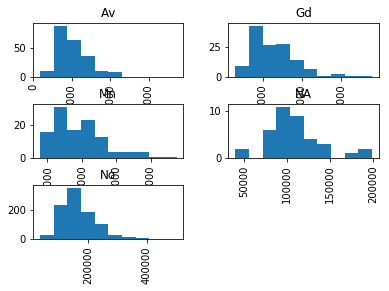

In [40]:
# Basement analysis
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF

# BsmtQual is a good signal as seen in the histograms. We will keep BsmtQual
print df.BsmtQual.value_counts()
df.hist(column="SalePrice",by="BsmtQual",bins=10)

# Gd and TA are almost same. Fa + Po is just 47/1460. We will drop BsmtCond
print df.BsmtCond.value_counts()
df.hist(column="SalePrice",by="BsmtCond",bins=10)

# The histograms for top values look the same. Revisit this later. We will drop BsmtExposure
print df.BsmtExposure.value_counts()
df.hist(column="SalePrice",by="BsmtExposure",bins=10)


In [41]:
# As seen below: TotalBsmtSF = BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF
df.filter(items=["BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "SalePrice"]).head(10)

,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice
0,GLQ,706,Unf,0,150,856,208500
1,ALQ,978,Unf,0,284,1262,181500
2,GLQ,486,Unf,0,434,920,223500
3,ALQ,216,Unf,0,540,756,140000
4,GLQ,655,Unf,0,490,1145,250000
5,GLQ,732,Unf,0,64,796,143000
6,GLQ,1369,Unf,0,317,1686,307000
7,ALQ,859,BLQ,32,216,1107,200000
8,Unf,0,Unf,0,952,952,129900
9,GLQ,851,Unf,0,140,991,118000


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64
Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
             BsmtFinSF1  TotalBsmtSF
BsmtFinSF1     1.000000     0.522396
TotalBsmtSF    0.522396     1.000000
            BsmtFinSF1  BsmtUnfSF
BsmtFinSF1    1.000000  -0.495251
BsmtUnfSF    -0.495251   1.000000


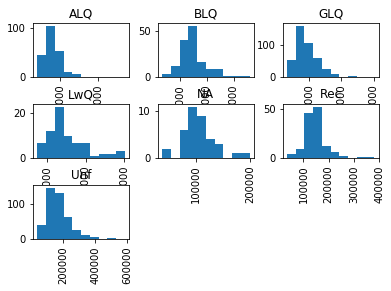

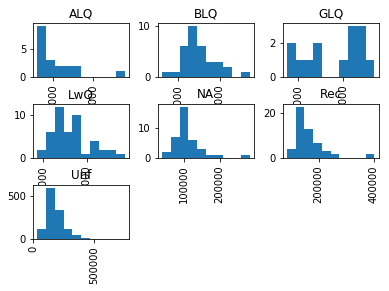

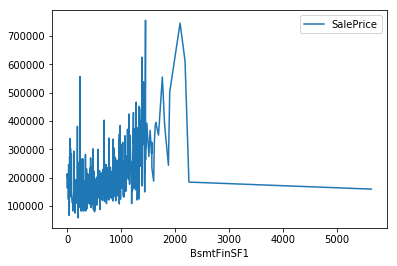

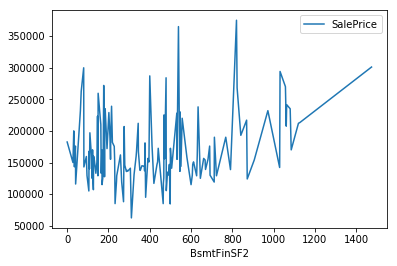

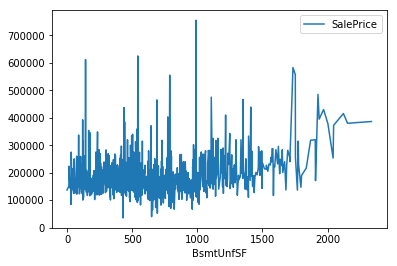

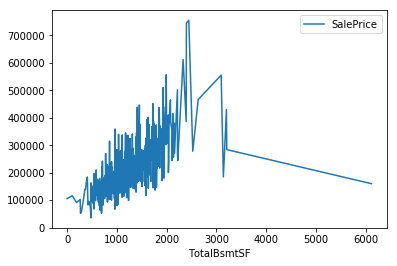

In [42]:
# Based on histograms and above table, this can be an useful signal. We will keep BsmtFinType1
print df.BsmtFinType1.value_counts()
df.hist(column="SalePrice",by="BsmtFinType1",bins=10)

# 1256/1460 is Unf. Not a lot of variation in other items. We will drop BsmtFinType2
print df.BsmtFinType2.value_counts()
df.hist(column="SalePrice",by="BsmtFinType2",bins=10)

# Based on above table, this can be an useful signal. We will keep BsmtFinSF1
df.pivot_table(values=["SalePrice"], index=["BsmtFinSF1"], aggfunc=np.mean).plot()

# BsmtFinSF2 will be mostly 0 as there is a different column for Unf. We will drop BsmtFinSF2
df.pivot_table(values=["SalePrice"], index=["BsmtFinSF2"], aggfunc=np.mean).plot()

# BsmtUnfSF will be populated whenever there is unf in basement. Hence we can keep this over TotalBsmtSF 
# We will keep BsmtUnfSF
df.pivot_table(values=["SalePrice"], index=["BsmtUnfSF"], aggfunc=np.mean).plot()

# TotalBsmtSF = BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF. Since BsmtFinSF2 will be zero for 91.4% of times, BsmtFinSF1 + BsmtUnfSF 
# will a good indication for TotalBsmtSF. We will drop TotalBsmtSF
df.pivot_table(values=["SalePrice"], index=["TotalBsmtSF"], aggfunc=np.mean).plot()

# The graphs for BsmtFinSF1 and TotalBsmtSF are similar. The correlation is 0.52 and hence we can drop TotalBsmtSF
print df.filter(items=["BsmtFinSF1", "TotalBsmtSF"]).corr()

# There is a -0.49 correlation but I still feel that we can keep both. We can revisit it later to change it
print df.filter(items=["BsmtFinSF1", "BsmtUnfSF"]).corr()

### Note: One thing I need to understand is how can we tell about these dependent cols to the ML algo. E.g. BsmtFinType1 
### and BsmtFinSF1 are related but ML algo will think about them as independent cols. We lose informtion here. 


GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e9939d0>,
      dtype=object)

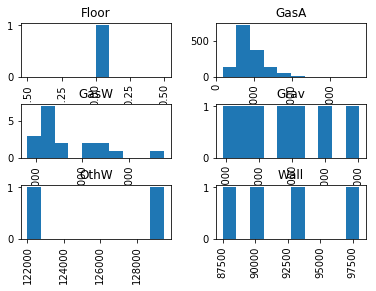

In [43]:
# Grav + Wall = 11/1460. For these two, the Saleprice is < 120k. But the amount is less to make any impact. 
# We will drop Heating
print df.Heating.value_counts()
df.hist(column="SalePrice",by="Heating",bins=10)

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e555210>,
      dtype=object)

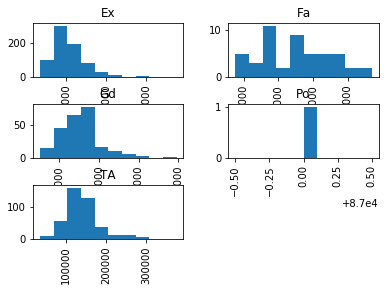

In [44]:
# This can be a good signal as most house prices are < 200k for TA + Gd but there are around 200 houses whose saleprice
# is >200k as it is Ex. We will keep HeatingQC
print df.HeatingQC.value_counts()
df.hist(column="SalePrice",by="HeatingQC",bins=10)

Y    1365
N      95
Name: CentralAir, dtype: int64
N    15
Y     7
Name: CentralAir, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e47fad0>,
      dtype=object)

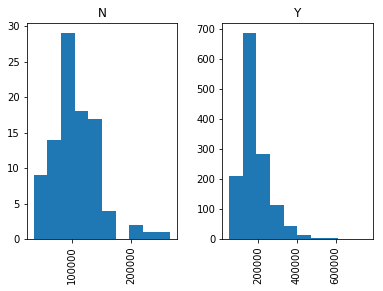

In [45]:
# Need to revisit it. If the value is N, then we can see that the house price will be less than 250k. 
# We will keep CentralAir 
print df.CentralAir.value_counts()
print df[df.SalePrice < 70000].CentralAir.value_counts()
df.hist(column="SalePrice",by="CentralAir",bins=10)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f888190>,
      dtype=object)

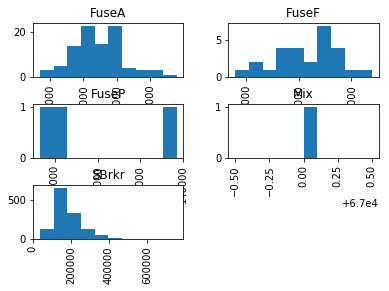

In [46]:
# Need to revisit it.Not enough data. We will drop Electrical
print df.Electrical.value_counts()
df.hist(column="SalePrice",by="Electrical",bins=10)

26
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64


,BedroomAbvGr,TotRmsAbvGrd,GrLivArea
BedroomAbvGr,1.00000,0.676620,0.521270
TotRmsAbvGrd,0.67662,1.000000,0.825489
GrLivArea,0.52127,0.825489,1.000000


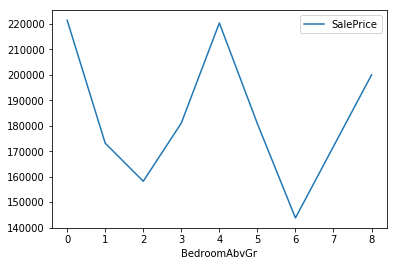

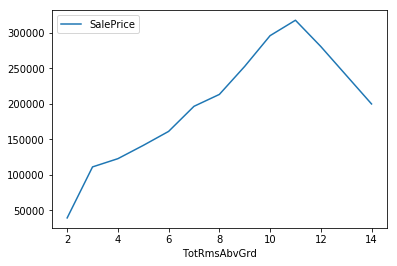

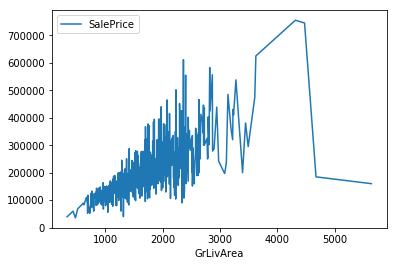

In [47]:
# Bedroom/Bathroom sizes
# 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, TotRmsAbvGrd

df1 = df.filter(items=["1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "TotRmsAbvGrd", "SalePrice"])

# Just 26 values for LowQualFinSF. We will drop LowQualFinSF
print df1[df1.LowQualFinSF != 0].LowQualFinSF.count()

# GrLivArea = 1stFlrSF + 2ndFlrSF. We will drop 1stFlrSF and 2ndFlrSF. We will keep GrLivArea

# Need to revisit if we want BedroomAbvGr/TotRmsAbvGrd as it directly correlates to GrLivArea. It is 0.82. 
# We will drop TotRmsAbvGrd and BedroomAbvGr
print df.BedroomAbvGr.value_counts()
print df.TotRmsAbvGrd.value_counts()
df.pivot_table(values=["SalePrice"], index=["BedroomAbvGr"], aggfunc=np.mean).plot()
df.pivot_table(values=["SalePrice"], index=["TotRmsAbvGrd"], aggfunc=np.mean).plot()
df.pivot_table(values=["SalePrice"], index=["GrLivArea"], aggfunc=np.mean).plot()
df.filter(items=["BedroomAbvGr", "TotRmsAbvGrd", "GrLivArea" ]).corr()

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  SalePrice  BsmtBath  Bath
0             1             0         2         1     208500         1     3
1             0             1         2         0     181500         1     2
2             1             0         2         1     223500         1     3
3             1             0         1         0     140000         1     1
4             1             0         2         1     250000         1     3
5             1             0         1         1     143000         1     2
6             1             0         2         0     307000         1     2
7             1             0         2         1     200000         1     3
8             0             0         2         0     129900         0     2
9             1             0         1         0     118000         1     1


,BsmtBath,Bath
BsmtBath,1.000000,-0.082187
Bath,-0.082187,1.000000


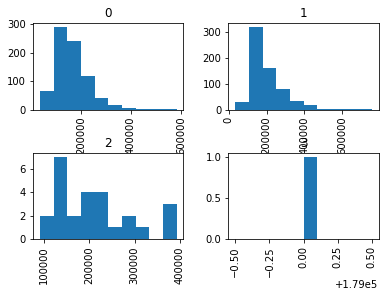

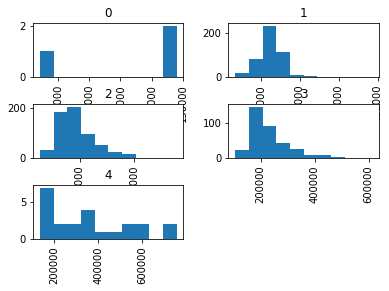

In [48]:
# We will drop BsmtFullBath, BsmtHalfBath, FullBath, HalfBath. We will keep df1['BsmtBath'] = df1['BsmtFullBath'] + df1['BsmtHalfBath']
# and df1['Bath'] = df1['FullBath'] + df1['HalfBath']
df1 = df.filter(items=["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "SalePrice"])
df1['BsmtBath'] = df1['BsmtFullBath'] + df1['BsmtHalfBath']
df1['Bath'] = df1['FullBath'] + df1['HalfBath']

print df1.head(10)
#print df.BsmtFullBath.value_counts()
#print df.BsmtHalfBath.value_counts()
#print df.FullBath.value_counts()
#print df.HalfBath.value_counts()

df1.hist(column="SalePrice",by="BsmtBath",bins=10)
df1.hist(column="SalePrice",by="Bath",bins=10)
#df.hist(column="SalePrice",by="FullBath",bins=10)
#df.hist(column="SalePrice",by="HalfBath",bins=10)

# No strong correlation
df1.filter(items=["BsmtBath", "Bath"]).corr()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fdd3490>,
      dtype=object)

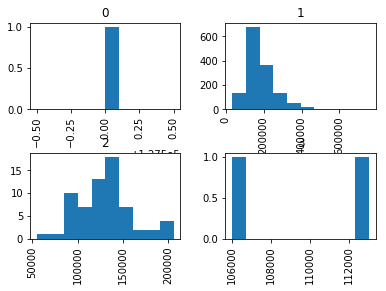

In [49]:
# Doesn't look like a good signal as have 1 or 2 kitchen don't change much. We will drop KitchenAbvGr
print df.KitchenAbvGr.value_counts()
df.hist(column="SalePrice",by="KitchenAbvGr",bins=10)

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11073cd90>,
      dtype=object)

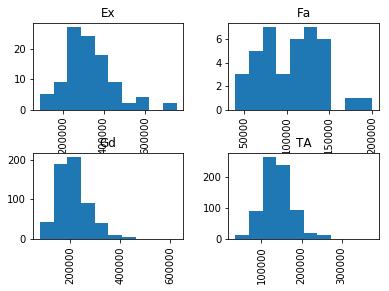

In [50]:
# Based on histograms, this looks like a good signal. We will keep KitchenQual
print df.KitchenQual.value_counts()
df.hist(column="SalePrice",by="KitchenQual",bins=10)

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110bd0290>,
      dtype=object)

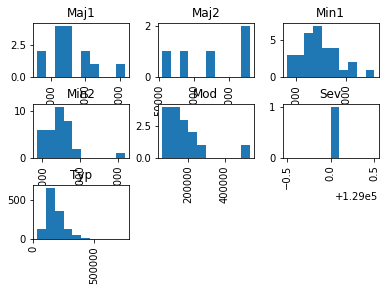

In [51]:
# Need to revisit it. I think we can club them together to make a binary - Typ / No Typ. 
# Less than 7% of the houses have any deductions. We will drop Functional
print df.Functional.value_counts()
df.hist(column="SalePrice",by="Functional",bins=10)

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110c4c0d0>,
      dtype=object)

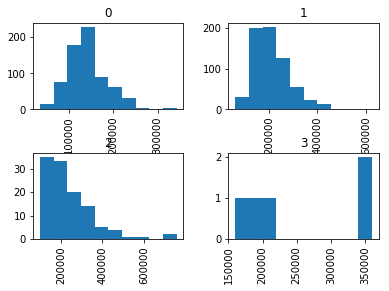

In [52]:
# Fireplaces is a good signal as having a fireplace incresaes the SalePrice. We will keep Fireplaces
print df.Fireplaces.value_counts()
df.hist(column="SalePrice",by="Fireplaces",bins=10)

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fdd3910>,
      dtype=object)

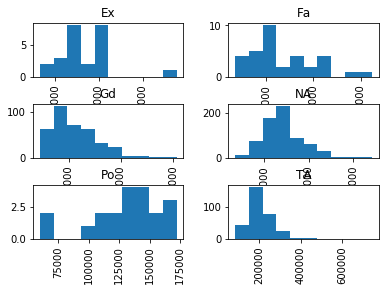

In [53]:
# FireplaceQu depends on number of Fireplaces. There are almost 50% houses without fireplaces. 
# Need to find a way to combine this with Fireplaces. I can see this as a useful signal as 
# Salesprice(Gd) > Salesprice(TA) > Salesprice(Fa). So need to revisit it. We will drop FireplaceQu
print df.FireplaceQu.value_counts()
df.hist(column="SalePrice",by="FireplaceQu",bins=10)

In [54]:
# Garage
# GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond
df.filter(items=["GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond", "SalePrice"]).head(10)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,SalePrice
0,Attchd,2003.0,RFn,2,548,TA,TA,208500
1,Attchd,1976.0,RFn,2,460,TA,TA,181500
2,Attchd,2001.0,RFn,2,608,TA,TA,223500
3,Detchd,1998.0,Unf,3,642,TA,TA,140000
4,Attchd,2000.0,RFn,3,836,TA,TA,250000
5,Attchd,1993.0,Unf,2,480,TA,TA,143000
6,Attchd,2004.0,RFn,2,636,TA,TA,307000
7,Attchd,1973.0,RFn,2,484,TA,TA,200000
8,Detchd,1931.0,Unf,2,468,Fa,TA,129900
9,Attchd,1939.0,RFn,1,205,Gd,TA,118000


In [55]:
# Removing the entries that doesn't have a garage, we can see 0.82 correlation between YearBuilt and GarageYrBlt. 
# We will drop GarageYrBlt
df[df.GarageYrBlt != 0].filter(items=["YearBuilt", "YearRemodAdd", "GarageYrBlt"]).corr()

,YearBuilt,YearRemodAdd,GarageYrBlt
YearBuilt,1.000000,0.618058,0.825667
YearRemodAdd,0.618058,1.000000,0.642277
GarageYrBlt,0.825667,0.642277,1.000000


TA    1311
NA      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1326
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
Unf    605
RFn    422
Fin    352
NA      81
Name: GarageFinish, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f08ef10>,
      dtype=object)

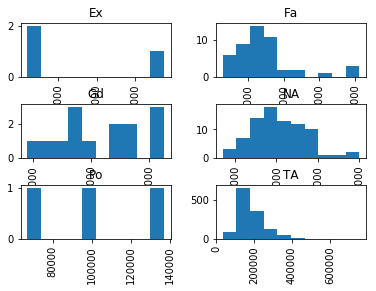

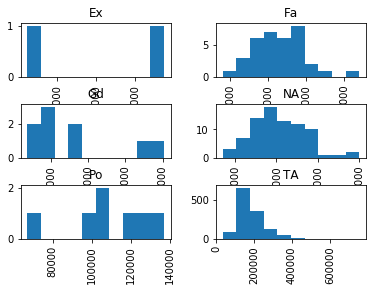

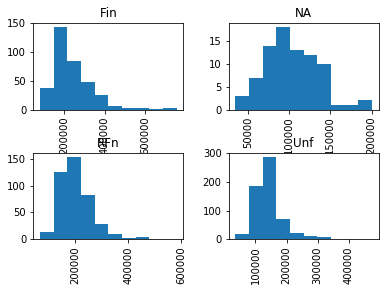

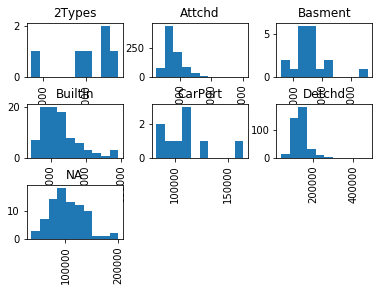

In [56]:
# Most are TA + NA. Not much useful info. We will drop GarageQual
print df.GarageQual.value_counts()
df.hist(column="SalePrice",by="GarageQual",bins=10)

# Most are TA + NA. Not much useful info. We will drop GarageCond
print df.GarageCond.value_counts()
df.hist(column="SalePrice",by="GarageCond",bins=10)

# Looks like a good signal. We will keep GarageFinish
print df.GarageFinish.value_counts()
df.hist(column="SalePrice",by="GarageFinish",bins=10)

# We can keep this as the price for NA is less then Attach/Detach. We will keep GarageType
print df.GarageType.value_counts()
df.hist(column="SalePrice",by="GarageType",bins=10)


In [57]:

### Is there a correlation with GarageType and GarageFinish? Data shows that Attchd is mostly Rfn and Detchd is Unf.
df1 = pd.crosstab(df['GarageFinish'], df['GarageType'])
df1

# Looking at the table, Unf is both for Attchd and Detchd. So we can keep this data.

GarageType,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,NA
GarageFinish,,,,,,,
Fin,1,274,4,59,0,14,0
NA,0,0,0,0,0,0,81
RFn,2,371,6,24,0,19,0
Unf,3,225,9,5,9,354,0


2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1064a5890>,
      dtype=object)

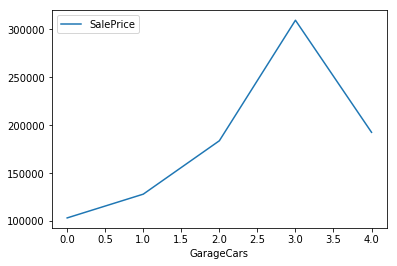

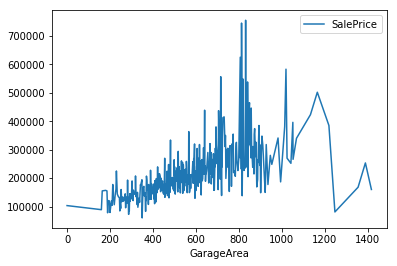

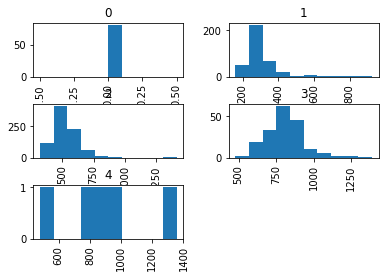

In [58]:
# GarageCars and GarageArea are related. We can revisit to see which one to keep
# We will keep GarageCars. We will drop GarageArea
print df.GarageCars.value_counts() 
df.pivot_table(values=["SalePrice"], index=["GarageCars"], aggfunc=np.mean).plot()

df.pivot_table(values=["SalePrice"], index=["GarageArea"], aggfunc=np.mean).plot()

# Having more cars means bigger GarageArea
df.hist(column="GarageArea",by="GarageCars",bins=10)


Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110128f90>,
      dtype=object)

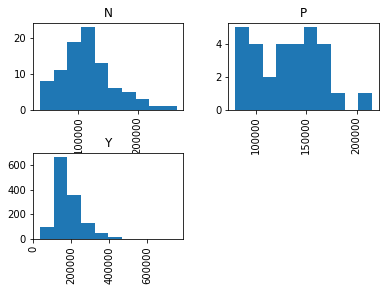

In [59]:
# N/P has similar outlines. Data is sparse. We will drop PavedDrive
print df.PavedDrive.value_counts()
df.hist(column="SalePrice",by="PavedDrive",bins=10)

   ScreenPorch  3SsnPorch  EnclosedPorch  OpenPorchSF  SalePrice  AggPorch
0            0          0              0           61     208500         0
1            0          0              0            0     181500         0
2            0          0              0           42     223500         0
3            0          0            272           35     140000       272
4            0          0              0           84     250000         0
5            0        320              0           30     143000       320
6            0          0              0           57     307000         0
7            0          0            228          204     200000       228
8            0          0            205            0     129900       205
9            0          0              0            4     118000         0
       ScreenPorch    3SsnPorch  EnclosedPorch  OpenPorchSF      SalePrice  \
count  1460.000000  1460.000000    1460.000000  1460.000000    1460.000000   
mean     15.060959 

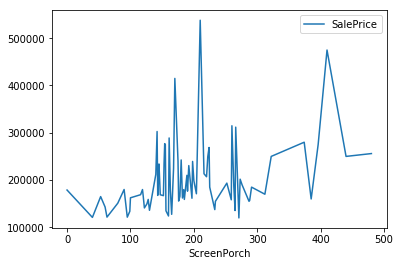

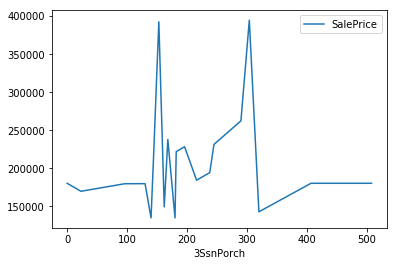

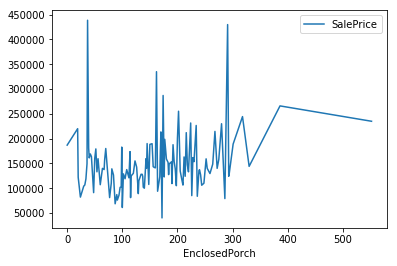

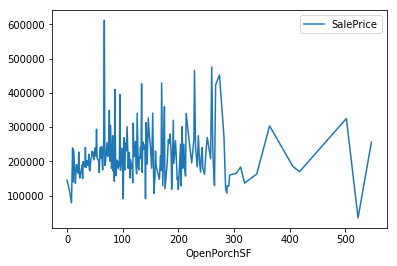

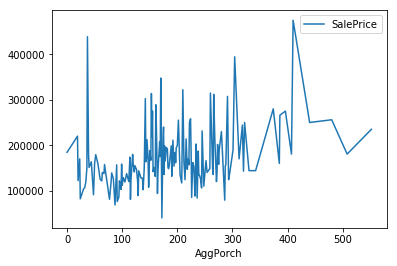

In [60]:
# Porch
# Porch Analysis - Based on the graphs below, OpenPorchSF is a very ambigious value as it doesn't so any incresae or 
# decrease in SalePrice with increase in SF value. The rest three are good samples. Instead of three individual columns,
# we can aggregate it into a single column. We will drop OpenPorchSF. We will keep df['AggPorch'] = df["ScreenPorch"] + df["3SsnPorch"] + df["EnclosedPorch"]

# Now lets see porch data
df1 = df.filter(items=['ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'OpenPorchSF', 'SalePrice'])
df1['AggPorch'] = df1["ScreenPorch"] + df1["3SsnPorch"] + df1["EnclosedPorch"] #+ df1["OpenPorchSF"]
print df1.head(10)
print df1.describe()

# Check price variation with porch
df1.pivot_table(values=["SalePrice"], index=["ScreenPorch"], aggfunc=np.mean).plot()
df1.pivot_table(values=["SalePrice"], index=["3SsnPorch"], aggfunc=np.mean).plot()
df1.pivot_table(values=["SalePrice"], index=["EnclosedPorch"], aggfunc=np.mean).plot()
df1.pivot_table(values=["SalePrice"], index=["OpenPorchSF"], aggfunc=np.mean).plot()
df1.pivot_table(values=["SalePrice"], index=["AggPorch"], aggfunc=np.mean).plot()

porchTot = []
# only 116/1460 
print "ScreenPorch: " + str(len(df[df['ScreenPorch'] != 0]))

# only 24/1460
print "3SsnPorch: " + str(len(df[df['3SsnPorch'] != 0]))

# only 208/1460
print "EnclosedPorch: " + str(len(df[df['EnclosedPorch'] != 0]))

# only 804/1460
print "OpenPorchSF: " + str(len(df[df['OpenPorchSF'] != 0]))

# So 1152/1460 houses had a some kind of porch
sumPorch = len(df[df['ScreenPorch'] != 0]) + len(df[df['3SsnPorch'] != 0]) + len(df[df['EnclosedPorch'] != 0]) + len(df[df['OpenPorchSF'] != 0])
print "sumPorch: " + str(sumPorch)



699


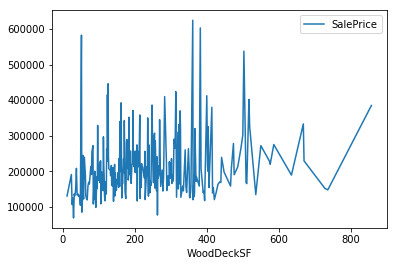

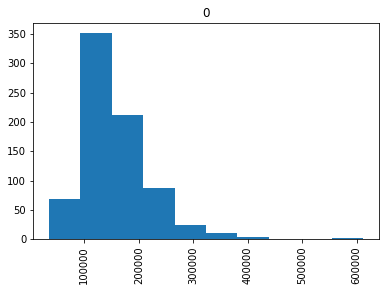

In [61]:
# Only less than 50% of the houses has WoodDeckSF. Even those house that has WoodDeckSF, we can't see a clear trend.
# We will drop WoodDeckSF
print df[df.WoodDeckSF > 0].WoodDeckSF.count()

df[df.WoodDeckSF > 0].pivot_table(values=["SalePrice"], index=["WoodDeckSF"], aggfunc=np.mean).plot()

df[df.WoodDeckSF == 0].hist(column="SalePrice",by="WoodDeckSF",bins=10)

In [62]:
# Only seven rows i.e. houses had a pool. We will drop PoolArea and PoolQC. 
print len(df[df.PoolArea != 0])
df[df.PoolArea > 0].filter(items=['PoolArea', 'SalePrice'])

7


,PoolArea,SalePrice
197,512,235000
810,648,181000
1170,576,171000
1182,555,745000
1298,480,160000
1386,519,250000
1423,738,274970


54
Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64
   MiscFeature  SalePrice
5         Shed     143000
7         Shed     200000
16        Shed     149000
17        Shed      90000
51        Shed     114500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11104b390>,
      dtype=object)

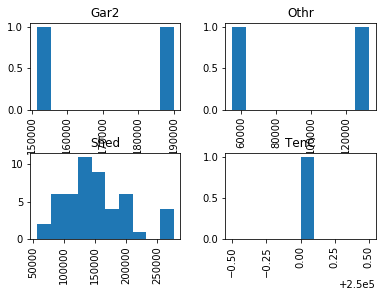

In [63]:
# only 54 misc features are in the dataset. So 54/1460  = ~3.7%. Also, the shed is 49/54 misc vals and it
# doesn't provide any info. We will drop MiscVal and MiscFeature
print df.MiscFeature.count()
print df.MiscFeature.value_counts()
print df[df.MiscVal > 0].filter(items=['MiscFeature', 'SalePrice']).head(5)

df[df.MiscFeature.notnull()].hist(column="SalePrice",by="MiscFeature",bins=10)

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f5d1f10>,
      dtype=object)

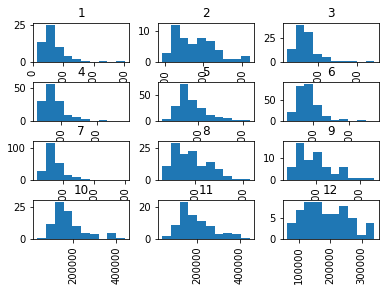

In [64]:
# More houses are sold in summer months. Houses in June are bit costlier. We can revisit this later to do another analysis
# We will drop MoSold
print df.MoSold.value_counts()
df.hist(column="SalePrice",by="MoSold",bins=10)

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ef133d0>,
      dtype=object)

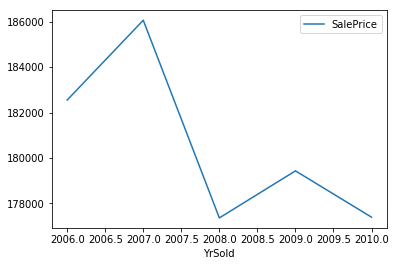

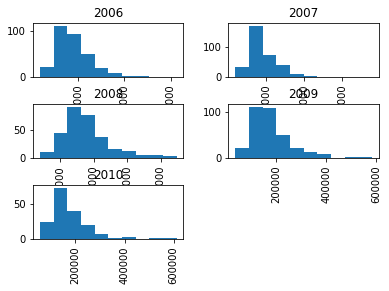

In [65]:
# The mean prices of houses sold in 2008 fell by 10k from 2007 (financial crisis). People didn't buy anything costlier 
# than 450k in 2008. Other 4 years, there was atleast one house ~600k. Nothing glaring come out of this. 
# We can keep YrSold
print df.YrSold.value_counts()
df.pivot_table(values=["SalePrice"], index=["YrSold"], aggfunc=np.mean).plot()
df.hist(column="SalePrice",by="YrSold",bins=10)

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
count       122.000000
mean     274945.418033
std      103239.582158
min      113000.000000
25%      194050.250000
50%      247453.000000
75%      341919.750000
max      611657.000000
Name: SalePrice, dtype: float64
count      1267.000000
mean     173401.836622
std       71129.686245
min       34900.000000
25%      128925.000000
50%      158000.000000
75%      202950.000000
max      755000.000000
Name: SalePrice, dtype: float64


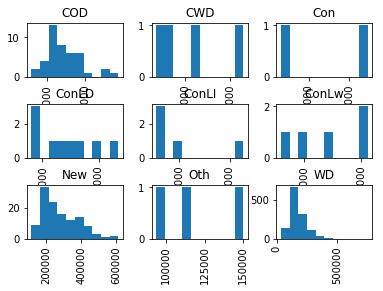

In [66]:
# The min price of New type was 113k and the mean price is 10k higher than WD type. Other types are sparse
# We can revisit it later. We will keep SaleType
print df.SaleType.value_counts()
df.hist(column="SalePrice",by="SaleType",bins=10)
print df[df.SaleType=="New"].SalePrice.describe()
print df[df.SaleType=="WD"].SalePrice.describe()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1045ec710>,
      dtype=object)

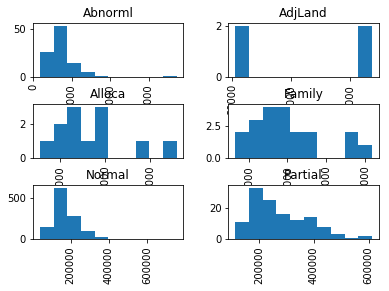

In [67]:
# Normal, partial and Abnorml kind of look the same. We will drop SaleCondition
print df.SaleCondition.value_counts()
df.hist(column="SalePrice",by="SaleCondition",bins=10)

##### Features To keep (Total: 32 columns):
MSSubClass   
LotArea   
LotConfig   
Neighborhood   
Condition1   
BldgType   
HouseStyle   
OverallQual   
OverallCond   
YearBuilt   
Exterior1st   
MasVnrType   
MasVnrArea   
ExterQual   
Foundation   
BsmtQual   
BsmtFinType1   
BsmtFinSF1   
BsmtUnfSF   
HeatingQC   
CentralAir   
GrLivArea   
df1['BsmtBath'] = df1['BsmtFullBath'] + df1['BsmtHalfBath']   
df1['Bath'] = df1['FullBath'] + df1['HalfBath']   
KitchenQual   
Fireplaces   
GarageFinish   
GarageType   
GarageCars   
df1['AggPorch'] = df1["ScreenPorch"] + df1["3SsnPorch"] + df1["EnclosedPorch”]   
YrSold   
SaleType   


##### Features To drop (57 columns):
MSZoning   
LotShape   
Street   
LandContour   
Utilities   
LandSlope   
Condition2   
YearRemodAdd   
RoofStyle   
RoofMatl   
Exterior2nd   
ExterCond   
BsmtCond   
BsmtExposure   
BsmtFinType2   
BsmtFinSF2   
TotalBsmtSF   
Heating   
Electrical   
LowQualFinSF   
1stFlrSF   
2ndFlrSF   
TotRmsAbvGrd   
BedroomAbvGr   
BsmtFullBath   
BsmtHalfBath   
FullBath   
HalfBath   
KitchenAbvGr   
Functional   
FireplaceQu   
GarageYrBlt   
GarageQual   
GarageCond   
GarageArea   
PavedDrive   
OpenPorchSF   
ScreenPorch   
3SsnPorch   
EnclosedPorch   
WoodDeckSF   
PoolArea   
PoolQC   
MiscVal   
MiscFeature   
MoSold   
SaleCondition   

In [85]:
# Create a final df based on the cols we need. Also, add the new three cols
finaldf = df.filter(items=[
"MSSubClass", 
"LotArea", 
"LotConfig", 
"Neighborhood", 
"Condition1",
"BldgType", 
"HouseStyle",
"OverallQual",
"OverallCond",
"YearBuilt",
"Exterior1st",
"MasVnrType",
"MasVnrArea",
"ExterQual",
"Foundation",
"BsmtQual",
"BsmtFinType1",
"BsmtFinSF1",
"BsmtUnfSF",
"HeatingQC",
"CentralAir",
"GrLivArea",
"KitchenQual",
"Fireplaces",
"GarageFinish",
"GarageType",
"GarageCars",
"YrSold",
"SaleType"])
finaldf["AggPorch"] = df["ScreenPorch"] + df["3SsnPorch"] + df["EnclosedPorch"]
finaldf["BsmtBath"] = df["BsmtFullBath"] + df["BsmtHalfBath"]
finaldf["Bath"] = df["FullBath"] + df["HalfBath"]

# check the dtypes of the df and convert objects into int by mapping them
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
MSSubClass      1460 non-null int64
LotArea         1460 non-null int64
LotConfig       1460 non-null object
Neighborhood    1460 non-null object
Condition1      1460 non-null object
BldgType        1460 non-null object
HouseStyle      1460 non-null object
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
Exterior1st     1460 non-null object
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
ExterQual       1460 non-null object
Foundation      1460 non-null object
BsmtQual        1460 non-null object
BsmtFinType1    1460 non-null object
BsmtFinSF1      1460 non-null int64
BsmtUnfSF       1460 non-null int64
HeatingQC       1460 non-null object
CentralAir      1460 non-null object
GrLivArea       1460 non-null int64
KitchenQual     1460 non-null object
Fireplaces      1460 non-null int64
GarageFinish 

In [86]:
finaldf.head(10)

,MSSubClass,LotArea,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Exterior1st,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,CentralAir,GrLivArea,KitchenQual,Fireplaces,GarageFinish,GarageType,GarageCars,YrSold,SaleType,AggPorch,BsmtBath,Bath
0,60,8450,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,VinylSd,BrkFace,196.0,Gd,PConc,Gd,GLQ,706,150,Ex,Y,1710,Gd,0,RFn,Attchd,2,2008,WD,0,1,3
1,20,9600,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,MetalSd,None,0.0,TA,CBlock,Gd,ALQ,978,284,Ex,Y,1262,TA,1,RFn,Attchd,2,2007,WD,0,1,2
2,60,11250,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,VinylSd,BrkFace,162.0,Gd,PConc,Gd,GLQ,486,434,Ex,Y,1786,Gd,1,RFn,Attchd,2,2008,WD,0,1,3
3,70,9550,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,Wd Sdng,None,0.0,TA,BrkTil,TA,ALQ,216,540,Gd,Y,1717,Gd,1,Unf,Detchd,3,2006,WD,272,1,1
4,60,14260,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,VinylSd,BrkFace,350.0,Gd,PConc,Gd,GLQ,655,490,Ex,Y,2198,Gd,1,RFn,Attchd,3,2008,WD,0,1,3
5,50,14115,Inside,Mitchel,Norm,1Fam,1.5Fin,5,5,1993,VinylSd,None,0.0,TA,Wood,Gd,GLQ,732,64,Ex,Y,1362,TA,0,Unf,Attchd,2,2009,WD,320,1,2
6,20,10084,Inside,Somerst,Norm,1Fam,1Story,8,5,2004,VinylSd,Stone,186.0,Gd,PConc,Ex,GLQ,1369,317,Ex,Y,1694,Gd,1,RFn,Attchd,2,2007,WD,0,1,2
7,60,10382,Corner,NWAmes,PosN,1Fam,2Story,7,6,1973,HdBoard,Stone,240.0,TA,CBlock,Gd,ALQ,859,216,Ex,Y,2090,TA,2,RFn,Attchd,2,2009,WD,228,1,3
8,50,6120,Inside,OldTown,Artery,1Fam,1.5Fin,7,5,1931,BrkFace,None,0.0,TA,BrkTil,TA,Unf,0,952,Gd,Y,1774,TA,2,Unf,Detchd,2,2008,WD,205,0,2
9,190,7420,Corner,BrkSide,Artery,2fmCon,1.5Unf,5,6,1939,MetalSd,None,0.0,TA,BrkTil,TA,GLQ,851,140,Ex,Y,1077,TA,2,RFn,Attchd,1,2008,WD,0,1,1


In [108]:
#print finaldf.MasVnrArea.value_counts()
finaldf["MasVnrArea"] = finaldf["MasVnrArea"].fillna(0).astype(int)

# Need to convert these 17 objects to numeric values. Use get_dummies to do it. 
fullDF = pd.get_dummies(finaldf)
fullDF.head(5)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtUnfSF,GrLivArea,Fireplaces,GarageCars,YrSold,AggPorch,BsmtBath,Bath,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,60,8450,7,5,2003,196,706,150,1710,0,2,2008,0,1,3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,20,9600,6,8,1976,0,978,284,1262,1,2,2007,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,11250,7,5,2001,162,486,434,1786,1,2,2008,0,1,3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,70,9550,7,5,1915,0,216,540,1717,1,3,2006,272,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,60,14260,8,5,2000,350,655,490,2198,1,3,2008,0,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [110]:
# Append the SalesPrice 
tainingDF = pd.concat([fullDF, df['SalePrice']], axis=1)
tainingDF.head(5)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtUnfSF,GrLivArea,Fireplaces,GarageCars,YrSold,AggPorch,BsmtBath,Bath,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalePrice
0,60,8450,7,5,2003,196,706,150,1710,0,2,2008,0,1,3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,208500
1,20,9600,6,8,1976,0,978,284,1262,1,2,2007,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,181500
2,60,11250,7,5,2001,162,486,434,1786,1,2,2008,0,1,3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,223500
3,70,9550,7,5,1915,0,216,540,1717,1,3,2006,272,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,140000
4,60,14260,8,5,2000,350,655,490,2198,1,3,2008,0,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,250000


In [111]:
# Get the arrays to pass it to the model
training_data = tainingDF.values
print training_data

train_features = training_data[:, 0:-1]
train_target = training_data[:, -1]


[[    60   8450      7 ...      0      1 208500]
 [    20   9600      6 ...      0      1 181500]
 [    60  11250      7 ...      0      1 223500]
 ...
 [    70   9042      7 ...      0      1 266500]
 [    20   9717      5 ...      0      1 142125]
 [    20   9937      5 ...      0      1 147500]]


In [113]:
# Apply machine learning algorithm - 
from sklearn import linear_model
lm = linear_model.LinearRegression()

model = lm.fit(train_features, train_target)
score = model.score(train_features, train_target)
print "The score is " + str(score)

The score is 0.8790274743538111


In [114]:
# Lets predict and see our accuracy 
df_test = pd.read_csv('test.csv')
df_test.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Clean the data. So we need to pass it through a function to get the values 

# Remove the id and see the 